In [1]:
import numpy as np
import linear_regression as lr
import matplotlib.pyplot as plt


In [2]:
class linear_regression_model:
    def __init__(self,d_star, lambda_values):
        self.d_star = d_star
        self.w_star = 0
        self.lambda_values = lambda_values
        self.lambda_star = 0
        self.error_list = list()
        self.loss = 0
        self.predicted_values = 0

    def determine_d_star(self):
        errors = lr.k_folds(years.copy(), percents.copy(), k , d, 0) # Retrieve the error for k-fold cv

        self.error_list=lr.turn_into_array_d_star(errors, k) # Get averages of the errors

        self.d_star = np.argmin(self.error_list) # Find index with lowest avg RMSE

    def determine_lambda_star(self):
        errors = lr.k_folds(years.copy(), percents.copy(), k , self.d_star, self.lambda_values)# Train using k folds

        self.error_list = lr.turn_into_array_d_star(errors, k) # tun the dictionary into an array
        
        self.lambda_star = self.lambda_values[np.argmin(self.error_list)] # find the element of the smallest error
    
    def determine_w_star(self):
        self.w_star = lr.calculate_w_star(input.copy(), output.copy(), self.d_star, self.lambda_star)

    def determine_loss(self):
        self.loss_value = lr.determine_loss(input.copy(), output.copy(), self.d_star, self.w_star,self.lambda_star)
    
    def predict_values(self):
        self.predicted_values = lr.predict(np.sort(final.copy()), input, output, self.d_star, self.w_star)

In [3]:
# Read in training data
filename = 'train.dat'
data = lr.read_in_data(filename)

data_year = data[0]
data_percent = data[1]

# Read in test data
filename = 'test.dat'

test_data = lr.read_in_data(filename)
test_data_year = test_data[0]
test_data_percent = test_data[1]

# Have user input number of dimensions and folds
d = 12
k = 6

# Split data into k number of sets
years = lr.create_k_sets(data_year, k)
percents = lr.create_k_sets(data_percent, k)

input = np.concatenate((data_year.copy(),test_data_year.copy())).flatten()
output = np.concatenate((data_percent.copy(), test_data_percent.copy())).flatten()

extra = np.float64([1968,1969,2021,2022,2023])
final = np.concatenate((input.copy(), extra)).flatten()

In [4]:
lin_reg = linear_regression_model(0,0)

lin_reg.determine_d_star()
lin_reg.determine_w_star()
lin_reg.determine_loss()
lin_reg.predict_values()

In [5]:
lambda_values = [0,np.exp(-25),np.exp(-20),np.exp(-14),np.exp(-7),np.exp(-3),1,np.exp(3),np.exp(7)]

lin_reg_with_regularized_parameter = linear_regression_model(12, lambda_values)

lin_reg_with_regularized_parameter.determine_lambda_star()
lin_reg_with_regularized_parameter.determine_w_star()
lin_reg_with_regularized_parameter.determine_loss()
lin_reg_with_regularized_parameter.predict_values()

In [6]:
values = list()

for element in lambda_values:
    if element == 0:
        values.append(-30)
    elif element == 1:
        values.append(element)
    else:
        values.append(np.log(element))

In [7]:
print('Avg RMSE for d=0,1,...12:\n',lin_reg.error_list)
print('\n\n\nd*:', lin_reg.d_star)
print('w*:', lin_reg.w_star)
# print(f'Final RMSE for All Training Data with d*={lin_reg.d_star}: ', lin_reg.errors2[lin_reg.d_star])
print(f'Loss for d*={lin_reg.d_star} ', lin_reg.loss_value)

Avg RMSE for d=0,1,...12:
 [1.01556056 1.08355616 0.77542931 0.78300169 0.49348184 0.57013501
 0.14235263 0.18750848 0.14631007 0.23647291 0.1648808  0.62578358
 0.68697833]



d*: 6
w*: [-0.14450258  0.64766179  3.2161173  -0.40762436 -2.80626507  0.15875824
  0.51335913]
Loss for d*=6  0.2862748190345614


In [8]:
print(f'\n\n\nλ*: {lin_reg_with_regularized_parameter.lambda_star}')
print('w* for λ*:', lin_reg_with_regularized_parameter.d_star)
print('Average training RMSE for λ*: ', lin_reg_with_regularized_parameter.error_list[np.argmin(lin_reg_with_regularized_parameter.error_list)])
# print(f'Final RMSE for All Training Data with λ*={lin_reg_with_regularized_parameter.lambda_star}:', lin_reg_with_regularized_parameter.lambda_errors2.get(lin_reg_with_regularized_parameter.lambda_star))
print(f'Loss for λ*={lin_reg_with_regularized_parameter.lambda_star}: ', lin_reg_with_regularized_parameter.loss_value)




λ*: 0.049787068367863944
w* for λ*: 12
Average training RMSE for λ*:  0.19854351124633865
Loss for λ*=0.049787068367863944:  0.40331482186556156


Text(0.5, 1.0, 'Working Percent of Total U.S. Population by Year\nUsing λ=0')

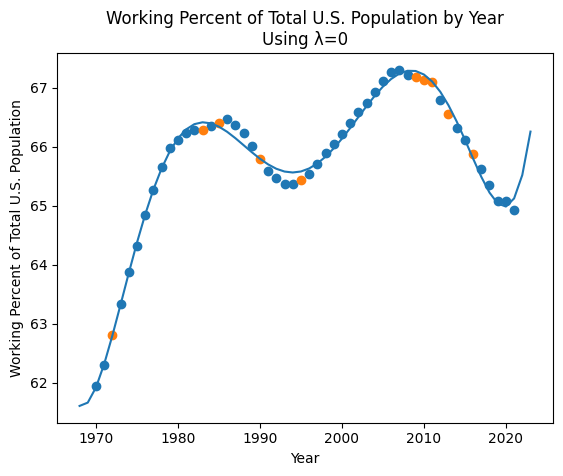

In [9]:

plt.scatter(data_year, data_percent)
plt.scatter(test_data_year, test_data_percent)
plt.plot(np.sort(final), lin_reg.predicted_values)
plt.xlabel('Year')
plt.ylabel('Working Percent of Total U.S. Population')
plt.title('Working Percent of Total U.S. Population by Year\nUsing λ=0')

Text(0.5, 1.0, 'Working Percent of Total U.S. Population by Year\nUsing λ*=0.049787068367863944')

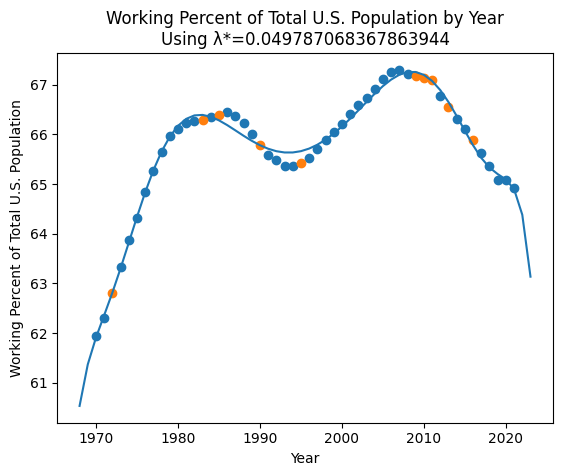

In [10]:
plt.scatter(years, percents)
plt.scatter(test_data_year, test_data_percent)
plt.plot(np.sort(final), lin_reg_with_regularized_parameter.predicted_values)
plt.xlabel('Year')
plt.ylabel('Working Percent of Total U.S. Population')
plt.title(f'Working Percent of Total U.S. Population by Year\nUsing λ*={lin_reg_with_regularized_parameter.lambda_star}')

Text(0.5, 1.0, 'Avg RMSE by Dimension')

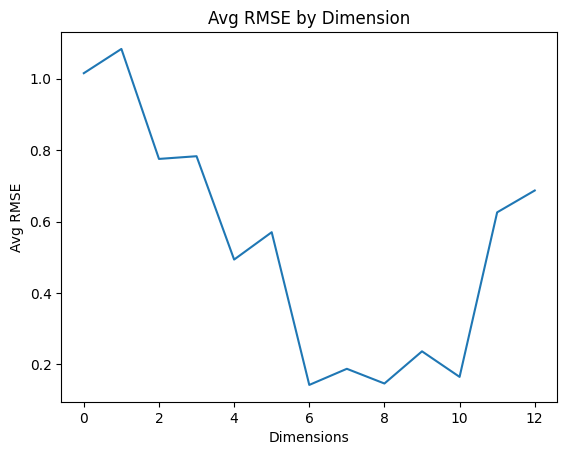

In [11]:
plt.plot(range(d+1), lin_reg.error_list)
plt.xlabel('Dimensions')
plt.ylabel('Avg RMSE')
plt.title('Avg RMSE by Dimension')

Text(0.5, 1.0, 'Avg RMSE by λ')

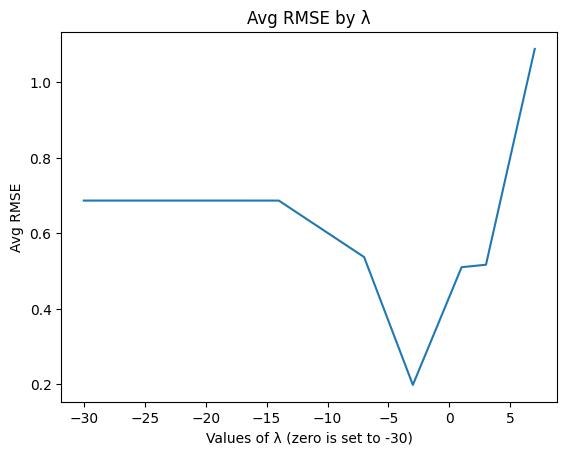

In [12]:
plt.plot(values, lin_reg_with_regularized_parameter.error_list)
plt.xlabel('Values of λ (zero is set to -30)')
plt.ylabel('Avg RMSE')
plt.title('Avg RMSE by λ')